In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# load dataset
data = pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# data cleaning
# check for missing values
print(data.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


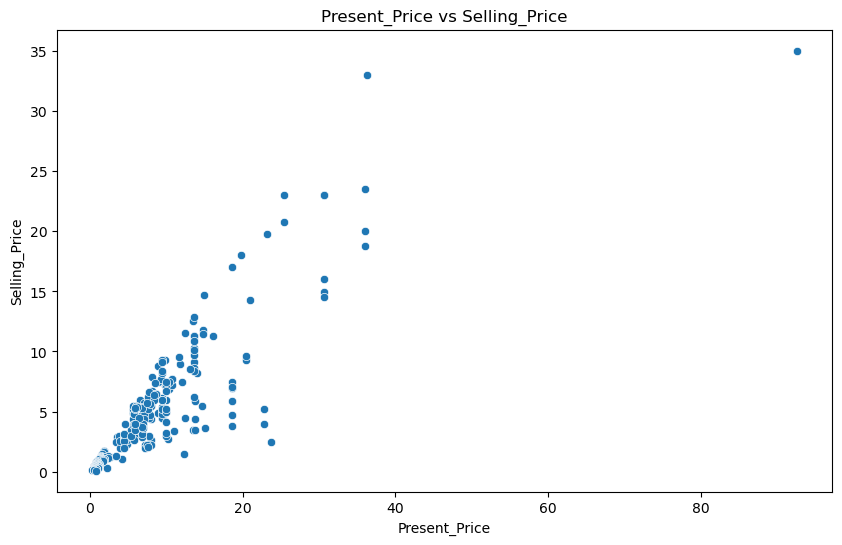

In [7]:
# Visualize Data
# Scatter plot for Present_Price vs Selling_Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data)
plt.title('Present_Price vs Selling_Price')
plt.show()

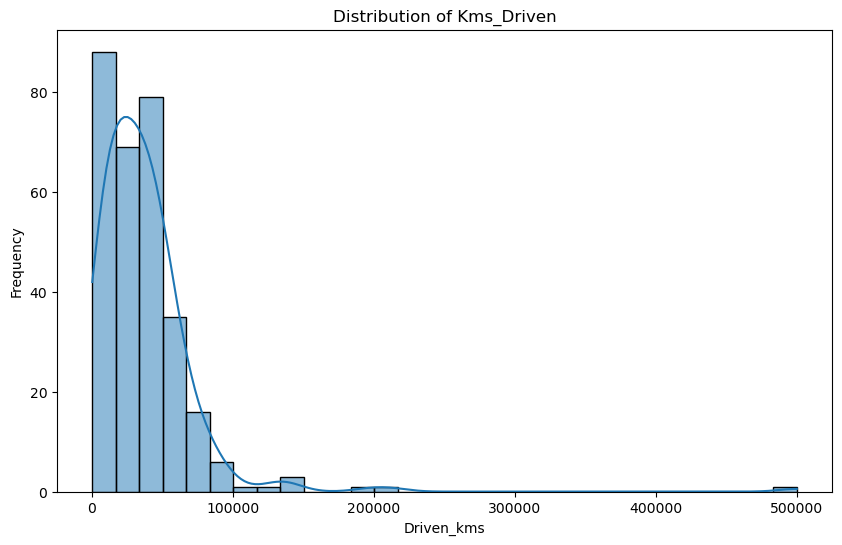

In [8]:
# Distribution of Kms_Driven
plt.figure(figsize=(10, 6))
sns.histplot(data['Driven_kms'], bins=30, kde=True)
plt.title('Distribution of Kms_Driven')
plt.xlabel('Driven_kms')
plt.ylabel('Frequency')
plt.show()

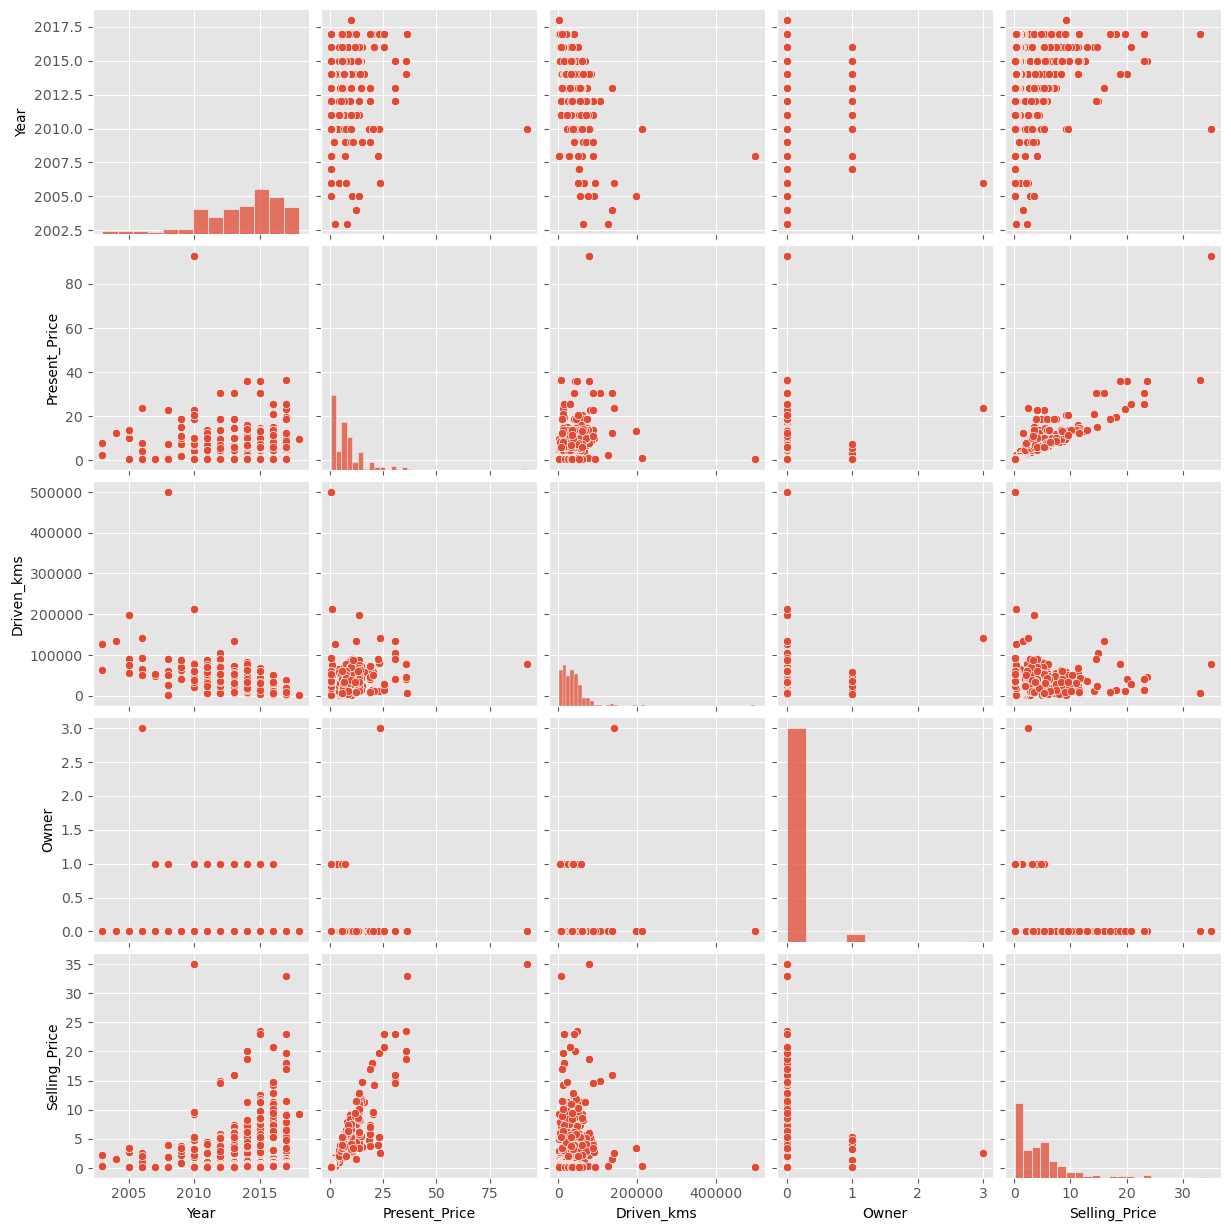

In [25]:
# Pairplot
sns.pairplot(data[['Year', 'Present_Price', 'Driven_kms', 'Owner', 'Selling_Price']])
plt.show()

In [9]:
# Define the features and the target variable
features = ['Year', 'Present_Price', 'Driven_kms', 'Owner', 'Fuel_Type', 'Transmission']
target = 'Selling_Price'

In [10]:
# Select the relevant columns from the original DataFrame
X = data[features]
y = data[target]

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Define transformers for numerical and categorical features
numeric_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
categorical_features = ['Fuel_Type', 'Transmission']

In [13]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer( transformers=[('num', numeric_transformer, numeric_features),
                                                ('cat', categorical_transformer, categorical_features)])

# Create a pipeline with the preprocessor and a model (e.g., Linear Regression)
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])

In [14]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type',
                                                   'Transmission'])])),
                ('regressor', LinearRegression())])

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1.3050295259199742
Mean Squared Error: 3.50296183022142
Root Mean Squared Error: 1.8716201084144775


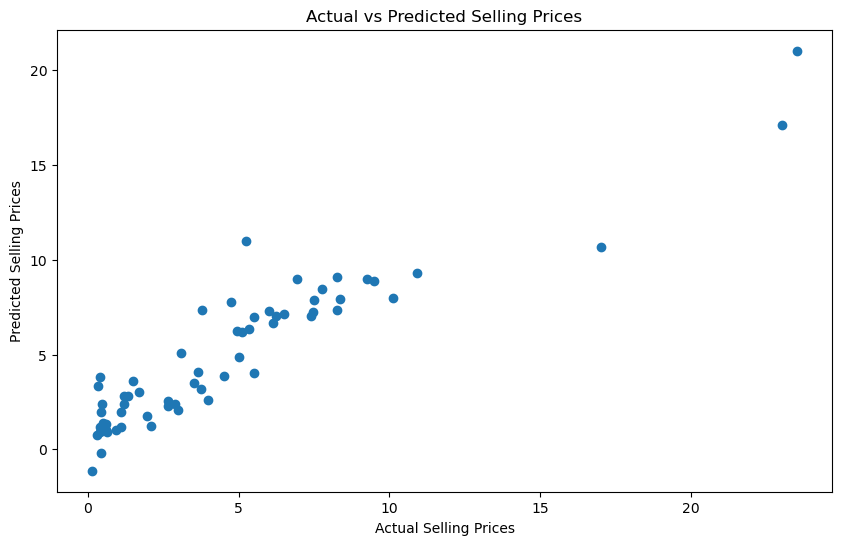

In [18]:
# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Selling Prices')
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.show()